In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
import scipy as sp

basepath = os.path.expanduser('../')

## Load Data

In [3]:
%%time

app_train = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_train.pkl'))
# app_test  = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_test.pkl'))

# bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau.pkl'))
# bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/POS_CASH_balance.pkl'))
credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/credit_card_balance.pkl'))

CPU times: user 123 ms, sys: 337 ms, total: 459 ms
Wall time: 465 ms


In [16]:
app_train.TARGET.value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

In [20]:
res = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
               .merge(prev_app.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_STATUS']], how='left')
print('Number of null values: {}'.format(res[res.NAME_CONTRACT_STATUS.isnull()].shape[0] / len(res)))

Number of null values: 0.011505046655782065


In [15]:
ss = pd.crosstab(res.NAME_CONTRACT_STATUS, res.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)
del ss
gc.collect();

TARGET                   0.0    1.0     ratio
NAME_CONTRACT_STATUS                         
Approved              818856  67243  0.075887
Canceled              235641  23800  0.091736
Refused               215952  29438  0.119964
Unused offer           20892   1879  0.082517


In [21]:
res = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
               .merge(prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_STATUS']], how='left')
    
print('Number of null values: {}'.format(res[res.NAME_CONTRACT_STATUS.isnull()].shape[0] / len(res)))

Number of null values: 0.019308390838309104


In [22]:
res = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
               .merge(prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Refused', ['SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_STATUS']], how='left')
    
print('Number of null values: {}'.format(res[res.NAME_CONTRACT_STATUS.isnull()].shape[0] / len(res)))

Number of null values: 0.4578298612261852


In [55]:
res = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
               .merge(prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', 
                                   ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT', 'AMT_ANNUITY']], how='left')
    
tmp   = (res.AMT_CREDIT / res.AMT_ANNUITY).replace([np.inf, -np.inf], np.nan)
tmp_a = tmp.groupby(res.SK_ID_CURR).mean()

tmp = app_train.SK_ID_CURR.map(tmp_a)
print(tmp[tmp.isnull()].shape[0] / len(tmp))

0.05676870095703893


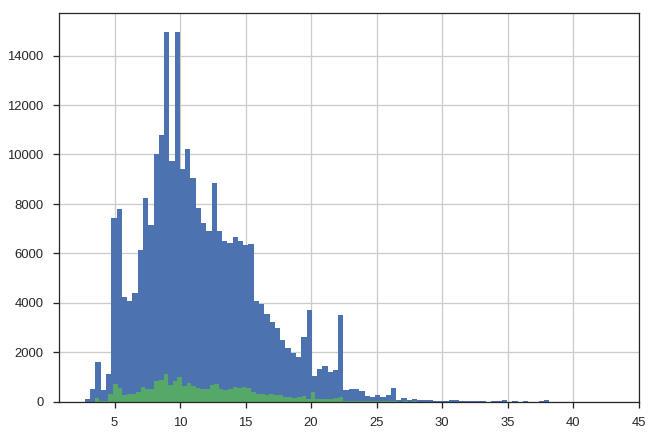

In [56]:
tmp[app_train.TARGET == 0].hist(bins=100)
tmp[app_train.TARGET == 1].hist(bins=100);

In [57]:
res = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
               .merge(prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Refused', 
                                   ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT', 'AMT_ANNUITY']], how='left')
    
tmp    = (res.AMT_CREDIT / res.AMT_ANNUITY).replace([np.inf, -np.inf], np.nan)
tmp_r  = tmp.groupby(res.SK_ID_CURR).mean()

tmp    = app_train.SK_ID_CURR.map(tmp_r)
print(tmp[tmp.isnull()].shape[0] / len(tmp))

0.7022382939146893


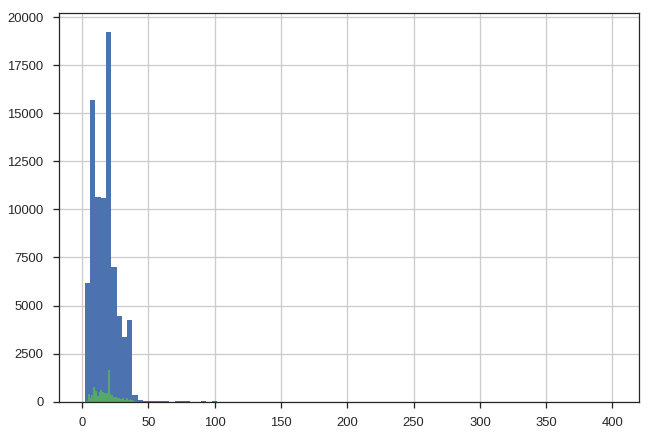

In [58]:
tmp[app_train.TARGET == 0].hist(bins=100)
tmp[app_train.TARGET == 1].hist(bins=100);

In [69]:
diff = tmp_a.subtract(tmp_r, fill_value=0)
tmp  = app_train.SK_ID_CURR.map(diff)

print(tmp[tmp.isnull()].shape[0] / len(tmp))

0.05494762788973403


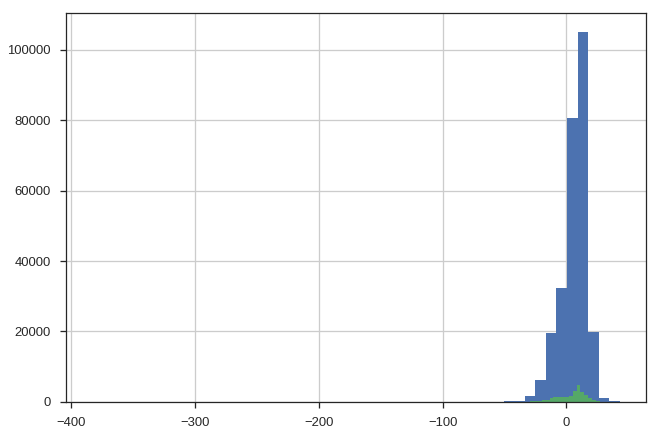

In [71]:
tmp[app_train.TARGET == 0].hist(bins=50)
tmp[app_train.TARGET == 1].hist(bins=50);